In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
from ipywidgets import interact
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import pandas as pd

init_notebook_mode(connected=True)

def ct_viewer(im):
    def plot_image(myslice):
        plt.imshow(im[myslice], cmap=plt.cm.jet)
    interact(plot_image, myslice=(0, im.shape[0]))
    return; 

In [16]:
im1=sitk.ReadImage('/home/crct/CRCT/JupyterNotebook/data/image/6e/validation/6eldp2.W.mhd')
imref=sitk.ReadImage('/media/sf_CRCT/JupyterNotebook/data/image/6e/validation/profil6E.W.mhd')

im=sitk.Resample(imref, im1, sitk.Transform(), sitk.sitkNearestNeighbor, 0)

(50, 100, 50)
(4.0, 1.0, 4.0)


interactive(children=(IntSlider(value=25, description=u'myslice', max=50), Output()), _dom_classes=('widget-interact',))

89
(50, 50)


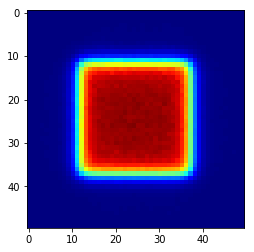

In [17]:
#im=sitk.ReadImage('/home/crct/CRCT/JupyterNotebook/data/image/12e/validation/12eldp2.W.mhd')
depth=10
print(im.GetSize())
print(im.GetSpacing())

imArray = sitk.GetArrayFromImage(im)
ct_viewer(imArray)

depthim=((im.GetSize()[1]-1)-int(depth))
print depthim
myslice=imArray[:, depthim, :]
plt.imshow(myslice, cmap=plt.cm.jet)

#y=imArray[19, :, 19]
ycross=myslice[:, 25]
yin=myslice[25, :]
print(myslice.shape)
#y=np.flipud(y)
x=np.arange(0,ycross.shape[0])
trace1=np.column_stack((x,ycross))
trace2=np.column_stack((x,yin))

In [18]:

datacross = Scatter(x = x,
               y = ycross,
               name='cross',
               mode = 'lines+markers')
datain = Scatter(x = x,
               y = yin,
               name = 'in',
               mode = 'lines+markers')


fig = dict(data=[datacross, datain])
iplot(fig, image='svg')

In [19]:
np.savetxt('/media/sf_CRCT/JupyterNotebook/data/gammaIndex/article/6e/validation/profil6E_cross.csv', trace1, delimiter=',')
np.savetxt('/media/sf_CRCT/JupyterNotebook/data/gammaIndex/article/6e/validation/profil6E_in_in.csv', trace2, delimiter=',')